In [1]:
import pandas as pd
import numpy as np

## Import User and Artist Dataset

In [41]:
#Reading the 'plays' dataset, turning all items into integers
users = pd.DataFrame(np.array([i.strip().split("\t") for i in open('lastfm_data/user_artists.dat', 'r', encoding='latin-1').readlines()]),
                       columns = ['userID', 'artistID', 'plays'])
users = users.drop(users.index[0])
users = users.apply(pd.to_numeric)
users.head()

#Reading 'artists' dataset, splitting the first column into three columns on the newline, turning artistid into int
artists = pd.DataFrame(open('lastfm_data/artists.dat', 'r',  encoding='latin-1').readlines())
artists = pd.DataFrame(artists[0].str.split("\t").values.tolist(),columns = ['artistID', 'name', 'url', 'pictureURL'])
artists = artists.drop(artists.index[0])
artists = artists.drop(columns=['pictureURL'])
artists['artistID'] = artists['artistID'].apply(pd.to_numeric)


In [42]:
print(users.head())
print()
print(artists.head())

   userID  artistID  plays
1       2        51  13883
2       2        52  11690
3       2        53  11351
4       2        54  10300
5       2        55   8983

   artistID               name                                         url
1         1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER
2         2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams
3         3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest
4         4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois
5         5        Bella Morte        http://www.last.fm/music/Bella+Morte


In [43]:
users_artists = pd.merge(users, artists, on='artistID', how='left')

In [44]:
users_artists.head()

,userID,artistID,plays,name,url
0,2,51,13883,Duran Duran,http://www.last.fm/music/Duran+Duran
1,2,52,11690,Morcheeba,http://www.last.fm/music/Morcheeba
2,2,53,11351,Air,http://www.last.fm/music/Air
3,2,54,10300,Hooverphonic,http://www.last.fm/music/Hooverphonic
4,2,55,8983,Kylie Minogue,http://www.last.fm/music/Kylie+Minogue


## Create User-Artist Matrix

In [45]:
# Create a utility matrix A by pivoting ratings.df
users_artists_piv = users_artists.pivot(index = 'userID', columns = 'name', values = 'plays').fillna(0)
users_artists_piv.head()

name,!!!,!DISTAIN,!deladap,"""Weird Al"" Yankovic",#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
users_artists_piv=users_artists_piv.reset_index()

## Create a pivot tabs with Artists as rows, users as columns

In [7]:
artists_users_piv = users_artists.pivot(index = 'name', columns = 'userID', values = 'plays').fillna(0)
artists_users_piv.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
play_counts = users_artists_piv.sum(axis = 0, skipna = True).sort_values(ascending = False)
play_counts = pd.DataFrame(play_counts, columns = ['plays'])
play_counts.head()

,plays
name,
Britney Spears,2393140.0
Depeche Mode,1301308.0
Lady Gaga,1291387.0
Christina Aguilera,1058405.0
Paramore,963449.0


## Top 20 EDA Stuff for Fun

In [10]:
top_20 = pd.DataFrame(play_counts.nlargest(20, 'plays'))

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 20 artists by # Plays')

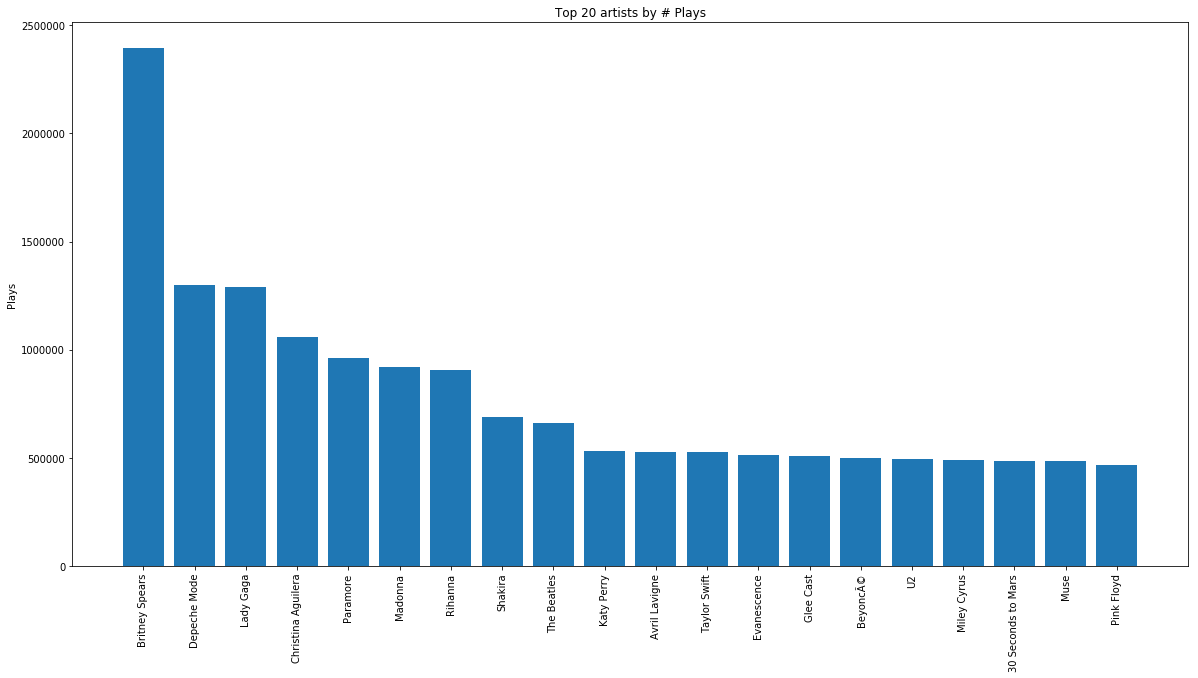

In [13]:
plt.figure(figsize=(20,10))
plt.bar(top_20.index, top_20['plays'])
plt.ylabel('Plays')
plt.xticks(top_20.index, rotation='vertical')
plt.title('Top 20 artists by # Plays')

## Back to User-Artist Matrix lol

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [15]:
artists = pd.DataFrame(users_artists_piv.columns)

In [48]:
users_artists_piv.head()

name,userID,!!!,!DISTAIN,!deladap,"""Weird Al"" Yankovic",#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df2=df1.drop('userID', axis=1)
df2.shape
#1,892 users and 17,632 artists

(1892, 17632)

In [50]:
distance_matrix = cosine_similarity(df2.T)
distance_matrix.shape

(17632, 17632)

In [20]:
distDF = pd.DataFrame(distance_matrix, columns=(df2.columns), index=(df2.columns))
distDF.head()

,!!!,!DISTAIN,!deladap,"""Weird Al"" Yankovic",#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
!!!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN

In [21]:
from sklearn.neighbors import NearestNeighbors

#Create a model with all neighbors
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(distDF)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [ ]:
query_index = np.random.choice()

In [ ]:
# nearest_neighbours= model.kneighbors(distDF, return_distance=True)

In [ ]:
# NNDF = pd.DataFrame(distDF.columns[nearest_neighbours[1]], index=distDF.index)
# top10=NNDF[NNDF.columns[1:11]]
# top10

## KNN v2

In [22]:
artists_users_piv = users_artists.pivot(index = 'name', columns = 'userID', values = 'plays').fillna(0)
artists_users_piv.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from scipy.sparse import csr_matrix
artists_users_matrix = csr_matrix(artists_users_piv.values)

In [25]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(artists_users_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [26]:
artists_users_piv.shape
#17,632 artists and 1,892 users

(17632, 1892)

In [31]:
query_index = np.random.choice(artists_users_piv.shape[0])
distances, indices = model_knn.kneighbors(np.array(artists_users_piv.iloc[query_index, :]).reshape(1, -1), n_neighbors = 6)

array([[  633, 16992,  9440,  5665,  4936,   634]])